In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import RMSprop

In [3]:
from google.colab import files

uploaded = files.upload()
data = pd.read_csv("spam_or_not_spam.csv")

print(data.isnull().sum())

data.dropna(inplace=True)
data["email"] = data["email"].astype(str)

print("Final Dataset Shape:", data.shape)

Saving spam_or_not_spam.csv to spam_or_not_spam.csv
email    1
label    0
dtype: int64
Final Dataset Shape: (2999, 2)


In [4]:
X_text = data["email"]
y_label = data["label"]

vectorizer = TfidfVectorizer(
    stop_words="english",
    max_features=4000,
    ngram_range=(1,2)
)

X_features = vectorizer.fit_transform(X_text)
print("TF-IDF Feature Shape:", X_features.shape)

TF-IDF Feature Shape: (2999, 4000)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_features.toarray(),
    y_label,
    test_size=0.25,
    random_state=7,
    stratify=y_label
)

print("Train Size:", X_train.shape)
print("Test Size:", X_test.shape)

Train Size: (2249, 4000)
Test Size: (750, 4000)


In [6]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(96, activation="relu"),
    Dropout(0.4),
    Dense(48, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    optimizer=RMSprop(learning_rate=0.0007),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 96)             │       384,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 96)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 48)             │         4,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            49 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 388,801 (1.48 MB)

 Trainable params: 388,801 (1.48 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=8,
    batch_size=64,
    verbose=1
)

Epoch 1/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7328 - loss: 0.6490 - val_accuracy: 0.8422 - val_loss: 0.4843
Epoch 2/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.8227 - loss: 0.4514 - val_accuracy: 0.8422 - val_loss: 0.3233
Epoch 3/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8270 - loss: 0.3194 - val_accuracy: 0.8711 - val_loss: 0.2293
Epoch 4/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8835 - loss: 0.2350 - val_accuracy: 0.9511 - val_loss: 0.1590
Epoch 5/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9574 - loss: 0.1595 - val_accuracy: 0.9756 - val_loss: 0.1097
Epoch 6/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9855 - loss: 0.0855 - val_accuracy: 0.9822 - val_loss: 0.0759
Epoch 7/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9906 - loss: 0.0600 - val_accuracy: 0.9822 - val_loss: 0.0576
Epoch 8/8
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9934 - loss: 0.0394 - val_accuracy: 0.9822 - val_loss:

In [8]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Accuracy: 0.9866666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       625
           1       1.00      0.92      0.96       125

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750

Confusion Matrix:
 [[625   0]
 [ 10 115]]


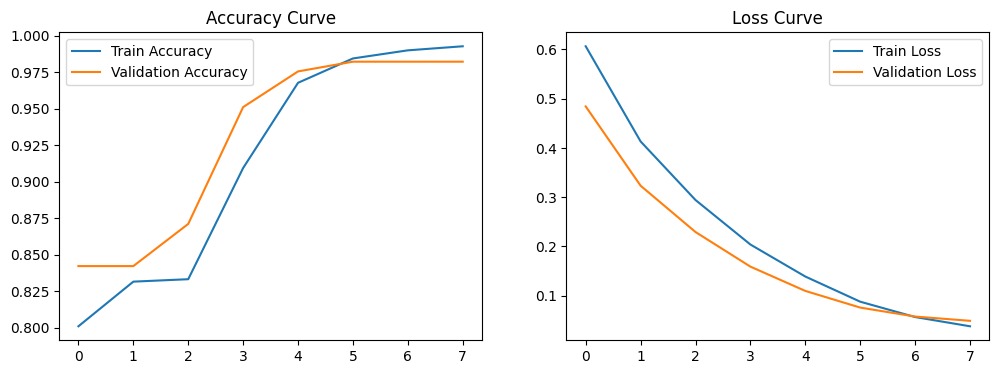

In [9]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.title("Loss Curve")

plt.show()